In [1]:
import pandas as pd

df = pd.read_csv('bot_detection_data.csv')

In [2]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [3]:
df.shape

(50000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [5]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


# Data description
There is total of 11 columns and 50 000 rows of data. Each row represents 1 tweet along with its info. The data takes up about 3.9+ MB of memory.
### Columns and description:
Info was gotten from the Readme.md file from the dataset origin
- User ID: Unique identifier for each user in the dataset.
- Username: The username associated with the user.
- Tweet: The text content of the tweet.
- Retweet Count: The number of times the tweet has been retweeted.
- Mention Count: The number of mentions in the tweet.
- Follower Count: The number of followers the user has.
- Verified: A boolean value indicating whether the user is verified or not.
- Bot Label: A label indicating whether the user is a bot (1) or not (0).
- Location: The location associated with the user.
- Created At: The date and time when the tweet was created.
- Hashtags: The hashtags associated with the tweet.

There are some Nan values in the Hastags columns, but these are not errors in our case, these describe a tweet, where the user did not select/write any hashtags. Thus these Nan values are not removed.

- From the data describe function, we can see that the median tweet got 50 retweets. The std is 29 for retweet count (pärast täpsuustada!!). The minimum number of retweet count is 0 and the maximum is 100.
- The median tweet got 2.5 mentions. The std is 1.7 for mention count. The minimum number of mention count is 0 and the maximum is 5.
- The median tweet user has got 4988.6 followers. The std is 2878.7 for follower count. The minimum number of follower count is 0 and the maximum is 10000.

In [6]:
df['Bot Label'].value_counts()

Bot Label
1    25018
0    24982
Name: count, dtype: int64

There is total of 25018 tweets by bots and 24982 tweets by not bots, aka real human tweets. It can be summarised as 50% tweets by bots and 50% tweets by humans.

In [7]:
df['User ID'].unique().size

50000

In [8]:
df['Username'].unique().size

40566

As the number of unique user IDs is the same as the total number of tweets in our dataset, this means that we have only 1 tweet from each user. This leaves out a possability of using the number of tweets per user. As the number of unique usernames is smaller than the total number of tweets, it might seem as we have many tweets per user, but this turned out to be not true based on the info gotten from the number of unique user IDs.

In [9]:
df['Verified'].value_counts()

Verified
True     25004
False    24996
Name: count, dtype: int64

We have a total of 25004 tweets from verified accounts and 24996 tweets from not verified accounts. To summarize, half of the tweets came from a verified account, the other half came from a not verified account.

Lets post a hypothesis, most of the tweets that came from a not verified account, are from bots.

In [10]:
df[(df['Verified'] == False) & (df['Bot Label'] == 1)].shape

(12540, 11)

Turns out, 12540 tweets did fit our hypothesis, this is half of the 25018 bots we wanted to catch, this alone will not be enough, but might help us later.

Lets have a look at where are the tweets coming from.

In [11]:
df['Location'].value_counts()

Location
South Michael        44
Lake Michael         40
North Jennifer       38
North Michael        38
Lake David           37
                     ..
Lake Sarahchester     1
Port Tiffanyberg      1
New Jasonbury         1
Payneshire            1
Deborahfort           1
Name: count, Length: 25199, dtype: int64

In [12]:
location_counts = df['Location'].value_counts()
location_counts.shape

(25199,)

Lets see how many of the most popular location tweets are from bots?

In [13]:
df[(df['Location'] == 'South Michael') & (df['Bot Label'] == 1)].shape

(21, 11)

Less than half this time. Lets look how many of the tweets came from places where the location count is 1.

In [14]:
filtered_df = df[df['Location'].isin(location_counts[location_counts == 1].index)]
filtered_df.shape

(16295, 11)

In [15]:
filtered_df[(filtered_df['Bot Label'] == 1)].shape

(8167, 11)

There is a total of 16295 tweets that have a location with the count of 1. Around half of these are from bots. It looks like the bots tweets are evenly distributed with locations.

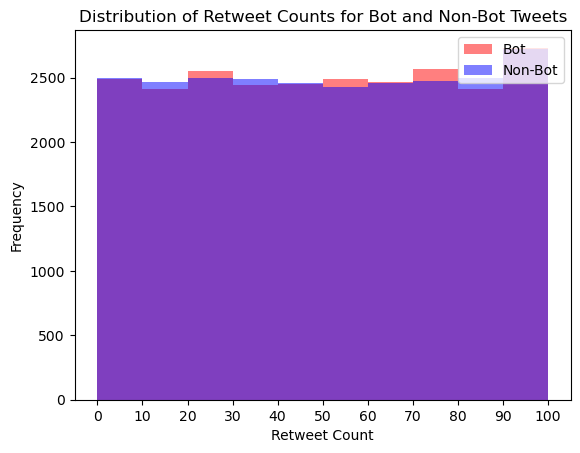

In [16]:
import matplotlib.pyplot as plt
import numpy as np

bin_edges = np.arange(0, 101, 10)
bot_tweets = df[df['Bot Label'] == 1]['Retweet Count']
plt.hist(bot_tweets, bins=bin_edges, alpha=0.5, label='Bot', color='red')

non_bot_tweets = df[df['Bot Label'] == 0]['Retweet Count']
plt.hist(non_bot_tweets, bins=bin_edges, alpha=0.5, label='Non-Bot', color='blue')

plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Distribution of Retweet Counts for Bot and Non-Bot Tweets')
plt.xticks(bin_edges)  
plt.legend()
plt.show()

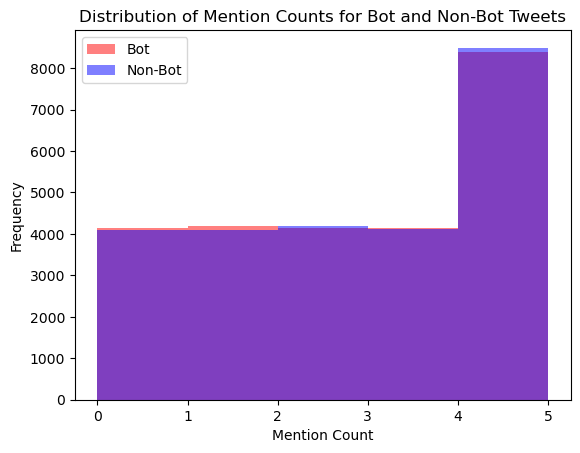

In [17]:
bins = range(0, 6) 

bot_tweets = df[df['Bot Label'] == 1]['Mention Count']
plt.hist(bot_tweets, bins=bins, alpha=0.5, label='Bot', color='red')

non_bot_tweets = df[df['Bot Label'] == 0]['Mention Count']
plt.hist(non_bot_tweets, bins=bins, alpha=0.5, label='Non-Bot', color='blue')

plt.xlabel('Mention Count')
plt.ylabel('Frequency')
plt.title('Distribution of Mention Counts for Bot and Non-Bot Tweets')
plt.xticks(bins) 
plt.legend()
plt.show()

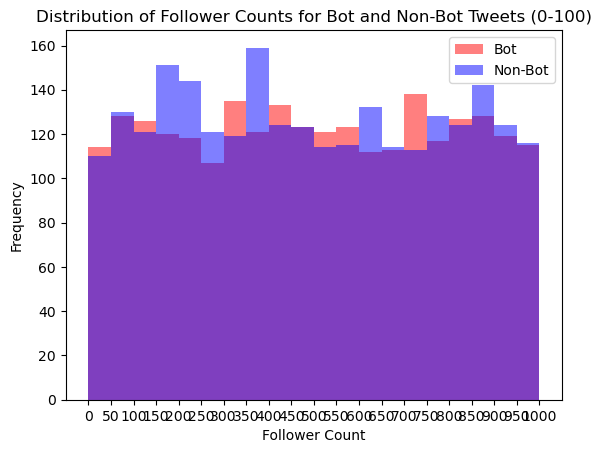

In [18]:
bin_edges = np.arange(0, 1001, 50)

bot_tweets = df[df['Bot Label'] == 1]['Follower Count']
plt.hist(bot_tweets, bins=bin_edges, alpha=0.5, label='Bot', color='red')

non_bot_tweets = df[df['Bot Label'] == 0]['Follower Count']
plt.hist(non_bot_tweets, bins=bin_edges, alpha=0.5, label='Non-Bot', color='blue')

plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Counts for Bot and Non-Bot Tweets (0-100)')
plt.xticks(bin_edges)  
plt.legend()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

df2 = df.copy()
df2['verified'] = df['Verified'].astype(int)
df2['tweet_length'] = df['Tweet'].astype(str).apply(len)
df2['hashtag_count'] = df['Hashtags'].astype(str).apply(lambda x: len(x.split(',')) if x != 'nan' else 0)
df2['created_at'] = pd.to_datetime(df['Created At'])
df2['tweet_hour'] = df2['created_at'].dt.hour
df2['tweet_weekday'] = df2['created_at'].dt.weekday

vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df2['Tweet'].astype(str))

X = pd.concat([
    df2[['Follower Count', 'verified', 'Retweet Count', 'Mention Count', 'tweet_length', 'hashtag_count', 'tweet_hour', 'tweet_weekday']].reset_index(drop=True),
    pd.DataFrame(tfidf_matrix.toarray())
], axis=1)

X.columns = X.columns.astype(str)  
y = df2['Bot Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      4968
           1       0.50      0.48      0.49      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      4968
           1       0.51      0.44      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



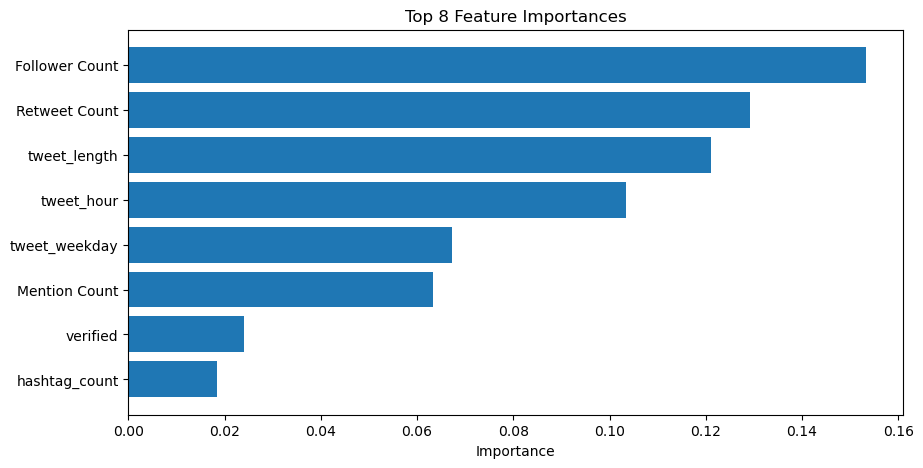

In [21]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-8:] 

plt.figure(figsize=(10, 5))
plt.title("Top 8 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      4968
           1       0.51      0.44      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [23]:
!pip install xgboost

In [24]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52      4968
           1       0.50      0.45      0.47      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [25]:
pip install pandas scikit-learn networkx sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['Tweet'], show_progress_bar=True)
cos_sim = cosine_similarity(embeddings)

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

In [ ]:
# Set threshold to keep only strong similarities
threshold = 0.7
G_text = nx.Graph()

for i in range(len(df)):
    G_text.add_node(i, label=df.iloc[i]['Bot Label'])

# Add edges
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if cos_sim[i][j] > threshold:
            G_text.add_edge(i, j, weight=cos_sim[i][j])

In [ ]:
meta_features = ['Follower Count', 'Retweet Count']  # Add more if needed
scaler = MinMaxScaler()
scaled_meta = scaler.fit_transform(df[meta_features])

meta_sim = cosine_similarity(scaled_meta)

# Build graph
G_meta = nx.Graph()
for i in range(len(df)):
    G_meta.add_node(i, label=df.iloc[i]['Bot Label'])

for i in range(len(df)):
    for j in range(i+1, len(df)):
        if meta_sim[i][j] > 0.7:  # You can tune this threshold
            G_meta.add_edge(i, j, weight=meta_sim[i][j])

In [ ]:
# Weighted combination: 60% text + 40% metadata
hybrid_sim = 0.6 * cos_sim + 0.4 * meta_sim

G_hybrid = nx.Graph()
for i in range(len(df)):
    G_hybrid.add_node(i, label=df.iloc[i]['Bot Label'])

for i in range(len(df)):
    for j in range(i+1, len(df)):
        if hybrid_sim[i][j] > 0.7:
            G_hybrid.add_edge(i, j, weight=hybrid_sim[i][j])

In [ ]:
print("Text Graph:", nx.info(G_text))
print("Meta Graph:", nx.info(G_meta))
print("Hybrid Graph:", nx.info(G_hybrid))

# Degree distribution example
degrees = [val for (node, val) in G_hybrid.degree()]
plt.hist(degrees, bins=30)
plt.title("Node Degree Distribution (Hybrid Graph)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

In [ ]:
!pip install node2vec

In [ ]:
from node2vec import Node2Vec
import networkx as nx

# Initialize Node2Vec model
node2vec = Node2Vec(
    G_text,                # your graph (can also be G_meta or G_hybrid)
    dimensions=64,         # embedding size
    walk_length=30,        # length of each random walk
    num_walks=200,         # number of walks per node
    workers=2              # number of CPU cores (parallel execution)
)

# Fit model
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Create embeddings DataFrame
import pandas as pd
embeddings = pd.DataFrame([model.wv[str(i)] for i in G_text.nodes()])
embeddings['label'] = [G_text.nodes[i]['label'] for i in G_text.nodes()]

In [ ]:
embeddings.shape
